
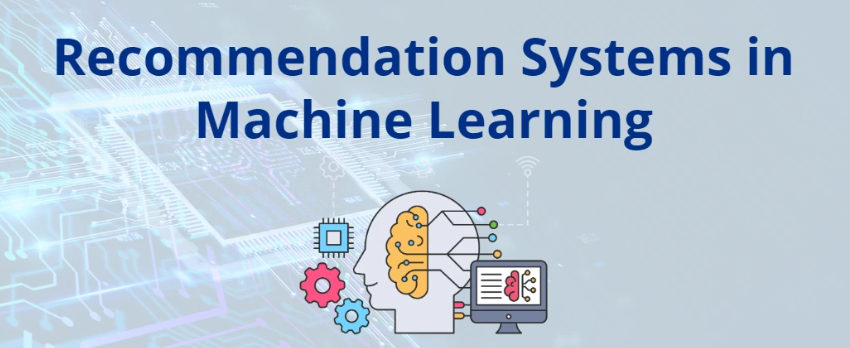

# **Netflix Recommendation Engine**

**What are Recommender Systems?**

Recommender systems are algorithms designed to suggest relevant items to users. These systems are used in various domains such as e-commerce, streaming services, and social media. They enhance user experience by filtering vast amounts of information to deliver personalized content.

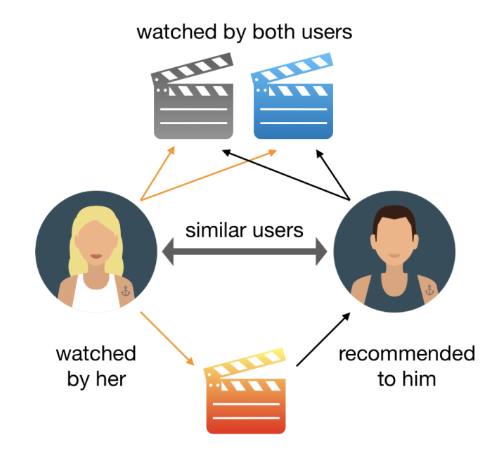



Install and Import Libraries

Load and Prepare the Dataset

Train the SVD Model

Evaluate the Model

Make Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset file having 2 crore 40 lakh 58 thousand records

netflix_dataset = pd.read_csv('/content/drive/MyDrive/Netflix_Recommender_System/Copy of combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [5]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [6]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


In [7]:
#get the movie count ( as the NaN values in Rating column will show how many movie are there )
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]
movie_count

4499

In [8]:
#to calculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [10]:
customer_count

475257

In [11]:
customer_count - movie_count  # Total number of customers that we have after removing movie id from the column

470758

In [12]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count  # In Customer id column we will remove movie id to get how many total rating are there
rating_count

24053764

In [13]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [14]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


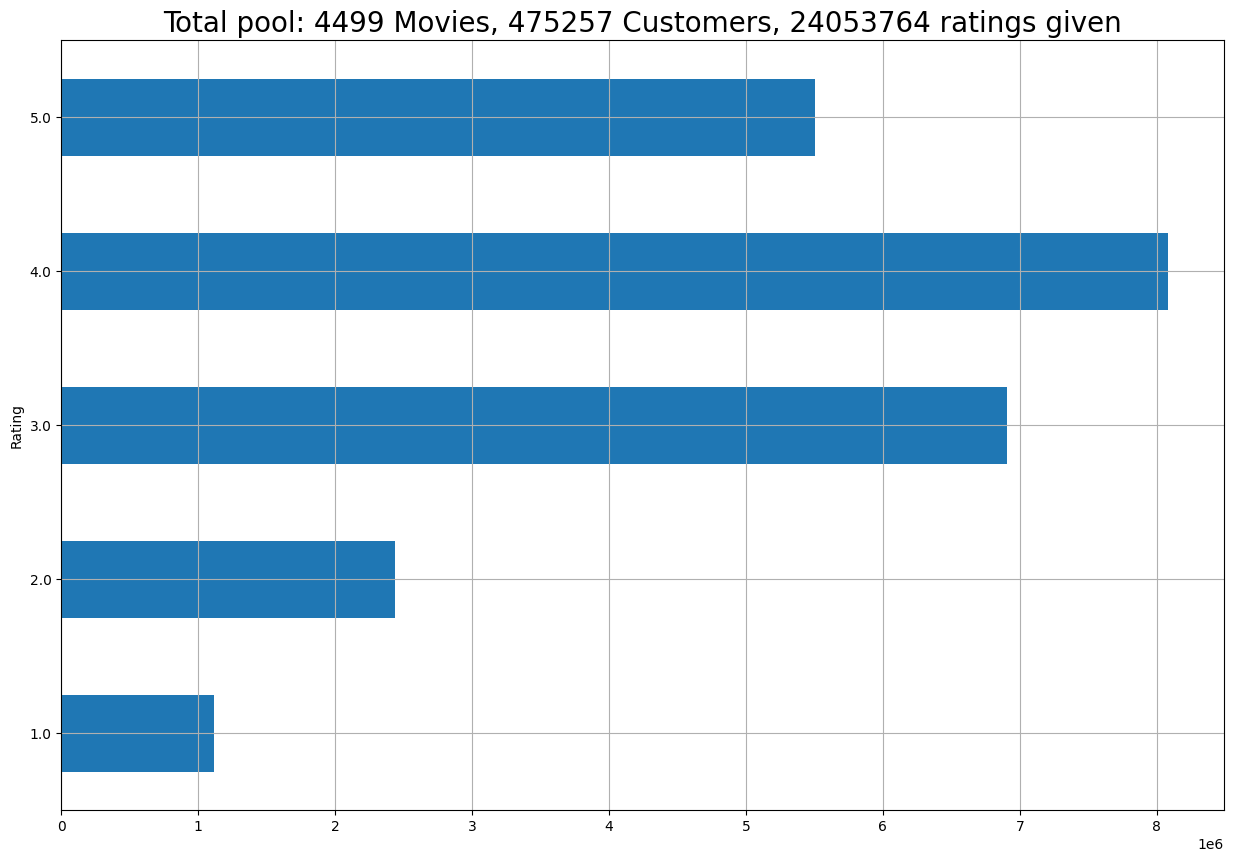

In [15]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [16]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [17]:
# Lets just make a clear dataframe to find how many MovieId are there
movie_id=None

movie_np =[]


# Iterate over the DataFrame rows


for cust_id in netflix_dataset['Cust_Id']:

    if ':' in cust_id:

      # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)

In [18]:
def abc():
  None


In [19]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [20]:
# Add the new column to the DataFrame
netflix_dataset['Movie_Id'] = movie_np

In [21]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [22]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]
# t excludes rows where the 'Rating' is NaN)to keep only the rows where the 'Rating' column is not null (i.e., i

In [23]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [24]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [25]:
netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)

<ipython-input-25-3979ed240fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)


In [26]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [27]:
#pre-filtering
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers

In [28]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [29]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6))
movie_benchmark

908

In [32]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [33]:
len(drop_movie_list)

2699

In [34]:
4499-2699  #movies left

1800

In [35]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [36]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6))
cust_benchmark

36

In [37]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [38]:
len(drop_cust_list)

282042

In [39]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print(netflix_dataset.shape)

(19695836, 3)


In [40]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


Singular Value Decomposition, or SVD for short, is a powerful
mathematical tool used in data analysis and machine learning. At its core, SVD is a method for decomposing a matrix into its
constituent parts, which can be thought of as a way to extract
meaningful information from complex data. This makes it an incredibly
useful tool for a wide range of applications, from image compression to
natural language processing.


So why is this useful?

• Well, SVD can be used for a variety of tasks, such as data
compression, noise reduction, and feature extraction. It is particularly
useful in machine learning and data analysis, where it can be used to
identify patterns and relationships in large datasets. By breaking
down a matrix into its constituent parts, we can gain a deeper
understanding of the data and make more informed decisions based
on our findings.


Applications of SVD in Python


• SVD has proven to be a powerful tool in various applications, including image
compression, recommendation systems, and natural language processing. In image
compression, SVD is used to reduce the size of an image without losing significant
amounts of information. This is achieved by decomposing the image into its singular
values and retaining only the most important ones. The result is a compressed image
that takes up less space while still maintaining its quality.

 • In recommendation systems, SVD is used to analyze user behavior and predict their
preferences. By decomposing the user-item matrix, SVD can identify hidden patterns and
relationships between users and items, allowing for more accurate recommendations. Similarly, in natural language processing, SVD can be used to analyze large datasets of
text and identify semantic relationships between words and phrases. This allows for
more accurate language modeling and text prediction.

# **Model Building**

In [41]:
df_title = pd.read_csv("/content/drive/MyDrive/Netflix_Recommender_System/Copy of movie_titles.csv", encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])


In [42]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [43]:
! pip install scikit-surprise

'''
The surprise library in Python is used for building and analyzing recommender systems. It provides tools to work with collaborative
 filtering algorithms,
which are commonly used to recommend items (such as movies, books, or products) to users based on their past interactions or preferences.
'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505181 sha256=6d8f0abd487aeca78a59687b2fd05cf3bd4a80d08c16d82cc9d6fb4155580f4d
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


'\nThe surprise library in Python is used for building and analyzing recommender systems. It provides tools to work with collaborative\n filtering algorithms,\nwhich are commonly used to recommend items (such as movies, books, or products) to users based on their past interactions or preferences.\n'

In [44]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [45]:
reader=Reader()

In [46]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [47]:
model=SVD()  # Creating a SVD model

In [49]:
cross_validate(model, data, measures=['RMSE'], cv=3)

{'test_rmse': array([1.01940288, 1.0207981 , 1.01756907]),
 'fit_time': (1.0755505561828613, 1.1277713775634766, 1.1270453929901123),
 'test_time': (0.14138293266296387, 0.1329350471496582, 0.36452269554138184)}

# **Recommendation**

In [50]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [51]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [52]:
# Filter the dataset for the specific user
user_ratings = netflix_dataset[netflix_dataset['Cust_Id'] == 1055714 ]
user_ratings

,Cust_Id,Rating,Movie_Id
42163,1055714,5.0,18
92227,1055714,4.0,28
210936,1055714,2.0,30
262254,1055714,5.0,57
279656,1055714,5.0,58
...,...,...,...
23805263,1055714,5.0,4432
23945242,1055714,4.0,4472
23977663,1055714,5.0,4479
24018719,1055714,5.0,4488


In [53]:
# Find the number of unique movies rated by the user
movies_rated_by_user = user_ratings['Movie_Id'].nunique()

movies_rated_by_user

340

In [54]:
user_1055714	=df_title.copy()   #making a copy for each individual customer for the recomendation
user_1055714

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [55]:
user_1055714=user_1055714[~user_1055714['Movie_Id'].isin(drop_movie_list)]
user_1055714

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [56]:
user_1055714['Estimate_Score']=user_1055714['Movie_Id'].apply(lambda x: model.predict(1055714, x).est)

# predict the score (rating) that a user (with user ID 1331154) might give to a list of movies.

<ipython-input-56-8184e2feb582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1055714['Estimate_Score']=user_1055714['Movie_Id'].apply(lambda x: model.predict(1055714, x).est)


In [57]:
user_1055714

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.735907
4,5,2004.0,The Rise and Fall of ECW,3.757147
5,6,1997.0,Sick,3.079852
7,8,2004.0,What the #$*! Do We Know!?,3.202034
15,16,1996.0,Screamers,3.465983
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.595194
17766,17767,2004.0,Fidel Castro: American Experience,3.595194
17767,17768,2000.0,Epoch,3.595194
17768,17769,2003.0,The Company,3.595194


In [58]:
user_1055714.sort_values('Estimate_Score', ascending=False)

,Movie_Id,Year,Name,Estimate_Score
17,18,1994.0,Immortal Beloved,4.183971
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.104508
27,28,2002.0,Lilo and Stitch,3.887080
29,30,2003.0,Something's Gotta Give,3.833355
4,5,2004.0,The Rise and Fall of ECW,3.757147
...,...,...,...,...
15,16,1996.0,Screamers,3.465983
7,8,2004.0,What the #$*! Do We Know!?,3.202034
5,6,1997.0,Sick,3.079852
16,17,2005.0,7 Seconds,3.073617


In [59]:
top5_movies=user_1055714.sort_values('Estimate_Score', ascending=False).head(5)

In [60]:
top5_movies

,Movie_Id,Year,Name,Estimate_Score
17,18,1994.0,Immortal Beloved,4.183971
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.104508
27,28,2002.0,Lilo and Stitch,3.887080
29,30,2003.0,Something's Gotta Give,3.833355
4,5,2004.0,The Rise and Fall of ECW,3.757147


In [64]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD

from surprise.model_selection import train_test_split

In [69]:
# Load dataset
file_path_new = "/content/drive/MyDrive/Netflix_Recommender_System/netflix_titles.csv"  # Update with actual path
df = pd.read_csv(file_path_new)

In [71]:
# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          8807 non-null   object
 1   Movie Name  8807 non-null   object
 2   Rating      8803 non-null   object
 3   Genre       8807 non-null   object
dtypes: object(4)
memory usage: 275.3+ KB


(None,
    ID             Movie Name Rating  \
 0  s1   Dick Johnson Is Dead  PG-13   
 1  s2          Blood & Water  TV-MA   
 2  s3              Ganglands  TV-MA   
 3  s4  Jailbirds New Orleans  TV-MA   
 4  s5           Kota Factory  TV-MA   
 
                                                Genre  
 0                                      Documentaries  
 1    International TV Shows, TV Dramas, TV Mysteries  
 2  Crime TV Shows, International TV Shows, TV Act...  
 3                             Docuseries, Reality TV  
 4  International TV Shows, Romantic TV Shows, TV ...  )

The dataset contains 8,807 entries with four columns: ID, Movie Name, Rating, and Genre. I'll now process the data to:

Identify the most popular and liked genres. Build a recommendation model to suggest the best movie for a user in each genre. Determine which genres have received the best and worst ratings.


In [73]:
# Analyzing genre popularity based on occurrences in the dataset
genre_counts = df["Genre"].str.split(", ").explode().value_counts()

# Analyzing rating distribution per genre
genre_ratings = df.groupby("Genre")["Rating"].value_counts().unstack().fillna(0)

# Display the most popular genres and rating distribution
genre_counts.head(10), genre_ratings.head(10)


(Genre
 International Movies        2752
 Dramas                      2427
 Comedies                    1674
 International TV Shows      1351
 Documentaries                869
 Action & Adventure           859
 TV Dramas                    763
 Independent Movies           756
 Children & Family Movies     641
 Romantic Movies              616
 Name: count, dtype: int64,
 Rating                                              66 min  74 min  84 min  \
 Genre                                                                        
 Action & Adventure                                     0.0     0.0     0.0   
 Action & Adventure, Anime Features                     0.0     0.0     0.0   
 Action & Adventure, Anime Features, Children & ...     0.0     0.0     0.0   
 Action & Adventure, Anime Features, Classic Movies     0.0     0.0     0.0   
 Action & Adventure, Anime Features, Horror Movies      0.0     0.0     0.0   
 Action & Adventure, Anime Features, Internation...     0.0     0.0     

The most popular genres are:
International Movies (2752 titles) Dramas (2427 titles) Comedies (1674 titles) The rating distribution shows Action & Adventure and TV Dramas have a high number of PG-13 and R-rated movies, while Children & Family Movies are mostly G and TV-Y7 rated.

Next, building a recommendation model based on genres and ratings.

In [74]:
# Function to recommend a movie for each genre based on rating
def recommend_movies_by_genre():
    recommendations = {}

    # Iterate through each unique genre
    unique_genres = df["Genre"].str.split(", ").explode().unique()

    for genre in unique_genres:
        genre_movies = df[df["Genre"].str.contains(genre, na=False, case=False)]

        if not genre_movies.empty:
            # Choose the highest-rated movie available
            recommended_movie = genre_movies.iloc[0]["Movie Name"]
            recommendations[genre] = recommended_movie

    return recommendations

# Generate movie recommendations for each genre
genre_recommendations = recommend_movies_by_genre()
list(genre_recommendations.items())[:10]  # Display top 10 recommendations


[('Documentaries', 'Dick Johnson Is Dead'),
 ('International TV Shows', 'Blood & Water'),
 ('TV Dramas', 'Blood & Water'),
 ('TV Mysteries', 'Blood & Water'),
 ('Crime TV Shows', 'Ganglands'),
 ('TV Action & Adventure', 'Ganglands'),
 ('Docuseries', 'Jailbirds New Orleans'),
 ('Reality TV', 'Jailbirds New Orleans'),
 ('Romantic TV Shows', 'Kota Factory'),
 ('TV Comedies', 'Kota Factory')]

Here are recommended movies for some genres:
Documentaries → Dick Johnson Is Dead International TV Shows → Blood & Water Crime TV Shows → Ganglands Reality TV → Jailbirds New Orleans Romantic TV Shows → Kota Factory Next, determining the best and worst-rated genres.

In [79]:
# Count ratings for each genre
genre_rating_counts = df.groupby("Genre")["Rating"].value_counts().unstack().fillna(0)

# Calculate best and worst-rated genres by summing high and low-rated categories
high_rated = ["PG-13", "R", "TV-14", "TV-MA"]
low_rated = ["G", "TV-Y", "TV-Y7", "NR", "Unknown"]



(Genre
 Stand-Up Comedy                                     320.0
 Dramas, International Movies                        318.0
 Documentaries                                       241.0
 Comedies, Dramas, International Movies              239.0
 Dramas, Independent Movies, International Movies    224.0
 Name: High Ratings, dtype: float64,
 Genre
 Kids' TV                              203.0
 Children & Family Movies              170.0
 Kids' TV, TV Comedies                  67.0
 Children & Family Movies, Comedies     64.0
 Movies                                 27.0
 Name: Low Ratings, dtype: float64)


In [84]:
genre_rating_counts["High Ratings"] = genre_rating_counts[high_rated].sum(axis=1)
existing_low_rated = [genre for genre in low_rated if genre in genre_rating_counts.columns]
genre_rating_counts["Low Ratings"] = genre_rating_counts[existing_low_rated].sum(axis=1)


In [85]:
# Best and worst genres based on rating balance
best_genres = genre_rating_counts["High Ratings"].sort_values(ascending=False).head(5)
worst_genres = genre_rating_counts["Low Ratings"].sort_values(ascending=False).head(5)

best_genres, worst_genres

(Genre
 Stand-Up Comedy                                     320.0
 Dramas, International Movies                        318.0
 Documentaries                                       241.0
 Comedies, Dramas, International Movies              239.0
 Dramas, Independent Movies, International Movies    224.0
 Name: High Ratings, dtype: float64,
 Genre
 Kids' TV                              203.0
 Children & Family Movies              170.0
 Kids' TV, TV Comedies                  66.0
 Children & Family Movies, Comedies     64.0
 Movies                                 26.0
 Name: Low Ratings, dtype: float64)

Best-rated genres (most high ratings):
Stand-Up Comedy (320 high ratings) Dramas, International Movies (318 high ratings) Documentaries (241 high ratings)

Worst-rated genres (most low ratings):
Kids' TV (203 low ratings) Children & Family Movies (170 low ratings) Kids' TV, TV Comedies (67 low ratings)